<a href="https://colab.research.google.com/github/bjin2364/mit-deep-learning/blob/main/tutorial_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Tutorial: brief introduction to convolutions](https://)**

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

## **1. Reading an image**

We will start with a tiny grayscale image of just 25x25 pixels. Such a small image will allow us exploring what happens to every pixel when we apply different functions to it. 

In [3]:
# 1.1 Get image from the web repository
!wget -nv http://people.csail.mit.edu/torralba/share/course/bird25x25.jpg

2021-07-20 00:42:55 URL:http://people.csail.mit.edu/torralba/share/course/bird25x25.jpg [10934/10934] -> "bird25x25.jpg" [1]


(25, 25, 3)


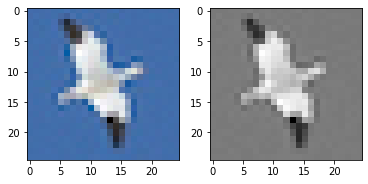

In [4]:
# 1.2 Load one image, visualize it and print its size 

# Read image
img_bgr = cv2.imread("bird25x25.jpg")

# OpenCV encodes color as B,G,R which is the opposite way on how we normaly store images. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Transfom to gray scale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Print image size
print (img_rgb.shape)

# Show the images
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)


In [5]:
# 1.3 The image is just an array of numbers. Let's look at it.
print (img_gray)

[[122 121 122 123 123 124 126 122 123 124 122 123 121 123 125 120 123 122
  123 121 122 122 122 122 122]
 [121 125 122 122 123 118 109 127 122 125 123 121 123 122 120 124 123 121
  122 123 124 123 123 122 122]
 [124 120 124 124 125  94  41  92 121 120 121 125 122 123 123 123 124 122
  123 122 122 121 123 123 123]
 [123 124 120 123 126 110  56  52  84 131 124 119 128 122 122 124 122 122
  122 122 124 123 122 121 122]
 [122 122 123 124 124 126  94  44  59 191 213 127 111 125 122 123 121 122
  123 122 122 122 122 122 122]
 [123 125 124 123 124 122 122  84  92 204 239 213 140 120 125 123 123 123
  123 122 121 120 122 123 121]
 [123 123 122 124 121 127 110 178 233 238 233 235 192 108 126 123 122 122
  122 122 123 124 123 122 122]
 [123 122 123 123 122 131 103 174 254 243 229 225 180 111 126 123 124 129
  126 123 122 122 122 123 124]
 [124 123 123 124 124 127 113 153 243 237 224 222 193 112 129 130 125 104
  112 122 121 124 123 124 122]
 [124 122 123 123 123 124 124 123 233 234 220 213 213 1

## **2. Convolution**

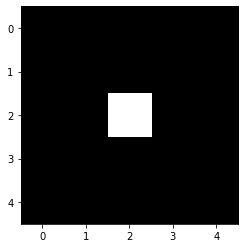

In [6]:
# 2.1 Let's start with a very simple image or 5x5 pixels:
input_img = np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,5,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]], dtype='float')
plt.imshow(input_img, cmap='gray', vmin=0, vmax=5)

In [7]:
# We define the following convolution kernel:
kernel = np.array([[1,0,0], 
                   [0,0,0], 
                   [0,0,-1]], dtype='float')


In [8]:
# The convolution is computed using the following function:
from scipy import signal
out_img = signal.convolve2d(input_img, kernel, 'same')
# the same 
out_img = cv2.filter2D(src=input_img, kernel=kernel, ddepth=-1, borderType=cv2.BORDER_CONSTANT)

# Let's look at the input, kernel and the result of the convolution
print('input image:')
print(input_img)
print('kernel:')
print(kernel)
print('output image:')
print(out_img)

input image:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
kernel:
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]
output image:
[[ 0.  0.  0.  0.  0.]
 [ 0. -5.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]]


Note that the convolution kernel appears mirrored (left-right, up-down)

Text(0.5, 1.0, 'output')

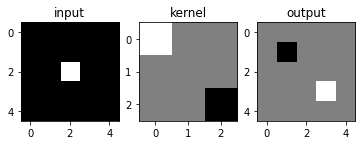

In [9]:
# Show the images
plt.subplot(1,3,1)
plt.imshow(input_img, cmap='gray', vmin=0, vmax=1)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(out_img, cmap='gray', vmin=-1, vmax=1)
plt.title('output')


Text(0.5, 1.0, 'output')

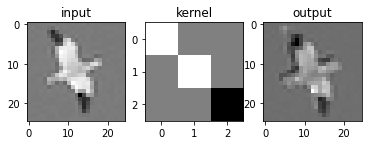

In [10]:
# 2.2 Now let's do this the real image that we loaded a the beginning of the tutorial
# The image is stored in the variable: img_gray
kernel = np.array([[1,0,0], 
                   [0,1,0], 
                   [0,0,-1]], dtype='float')
out = cv2.filter2D(src=img_gray.astype('float'), kernel=kernel, ddepth=-1, borderType=cv2.BORDER_REFLECT)
# Note that in the convolution we use now "BORDER_REFLECT". Change that to BORDER_CONSTANT.
# BORDER_REFLECT produces the following type of padding: fedcba|abcdefgh|hgfedcb

# Show the images
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=256)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(out, cmap='gray')
plt.title('output')

In [11]:
# Let's look at the numbersc(just the first 5x5 values):
print('input image:')
print(img_gray[0:5,0:5])
print('kernel:')
print(kernel)
print('output image:')
print(out[0:5,0:5])

input image:
[[122 121 122 123 123]
 [121 125 122 122 123]
 [124 120 124 124 125]
 [123 124 120 123 126]
 [122 122 123 124 124]]
kernel:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
output image:
[[119. 121. 121. 122. 128.]
 [123. 123. 119. 119. 152.]
 [121. 121. 126. 120. 137.]
 [125. 125. 116. 123. 124.]
 [120. 121. 124. 120. 125.]]


## **3. A familly of linear filters**


In [12]:
# binomial (low-pass filter)
binomial = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]], dtype='float')/16

# horizontal and vertical edge detection:
sobel_x = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]], dtype='float')

sobel_y = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]], dtype='float')

# Laplacian
laplacian = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]], dtype='float')

# Try using those filters in the section 2.2

## **4. Convolution in matrix form**

In [32]:
# The convolution is a linear operator. 
#
# The following function transforms a convolution kernel into a matrix. This is not computationally efficient, 
# but it will let us see the convolution from a different perspective.

def getMatrixFromKernel(kernel, imagesize):
  print("kernel shape: {}".format(kernel.shape))
  imagesize = int(imagesize) # I assume the input image is square.

  # loop over impulses
  r = np.zeros((imagesize*imagesize, imagesize*imagesize))
  k=0
  for x in range(0,imagesize):
    for y in range(0,imagesize):
      # Delta image: create an image with a single 1
      delta = np.zeros((imagesize,imagesize))
      delta[x,y] = 1

      # Filter the delta image with the kernel
      out = cv2.filter2D(src=delta, kernel=kernel, ddepth=-1, borderType=cv2.BORDER_CONSTANT) # check what happens using BORDER_REFLECT

      # make a column vector 
      out = out.flatten()

      r[:,k] = out
      k=k+1
  return r

(25, 25)


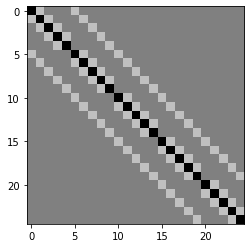

In [14]:
# Let's check what happens with one kernel:
kernel = laplacian
R = getMatrixFromKernel(kernel, 5)

# We can now plot the matrix equivalent to the convolution kernel:
print(R.shape)
plt.imshow(R, cmap='gray', vmin=-2, vmax=2)

(5, 5)
(25, 25)


Text(0.5, 1.0, 'output')

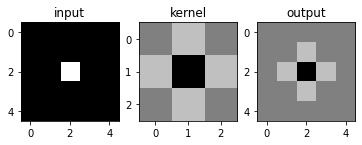

In [15]:
# We can now check that multiplying by this matrix is equivalent to the convolution

# First let's build a simple image:
input_img = np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]], dtype='float')
# now we rasterize the image into a vector:
input_img_flat = input_img.flatten()
print(input_img.shape)
print(R.shape)

output = np.dot(R,input_img_flat)
output= np.reshape(output, (5,5))

plt.subplot(1,3,1)
plt.imshow(input_img, cmap='gray', vmin=0, vmax=1)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-2, vmax=2)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(output, cmap='gray', vmin=-2, vmax=2)
plt.title('output')

(25, 25)


Text(0.5, 1.0, 'output')

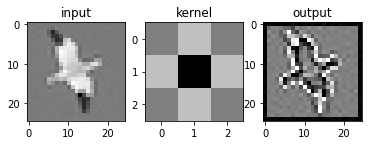

In [16]:
# Another example:

R = getMatrixFromKernel(kernel, 25)
print(img_gray.shape)
output = np.dot(R,img_gray.flatten()).reshape((25,25))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-2, vmax=2)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(output, cmap='gray', vmin=-128, vmax=128)
plt.title('output')

## **5. Hybrid images**

In [17]:
!wget -nv http://people.csail.mit.edu/torralba/share/course/zebra.jpg
!wget -nv  https://assets.petco.com/petco/image/upload/f_auto,q_auto/rabbit-9

2021-07-20 00:42:59 URL:http://people.csail.mit.edu/torralba/share/course/zebra.jpg [360085/360085] -> "zebra.jpg" [1]
2021-07-20 00:42:59 URL:https://assets.petco.com/petco/image/upload/f_auto,q_auto/rabbit-9 [65174/65174] -> "rabbit-9" [1]


(1011, 1415, 3)
(1000, 1100, 3)
(1100, 1100, 3)


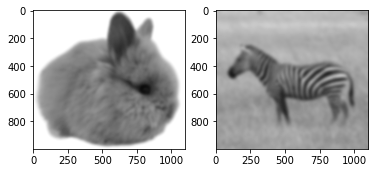

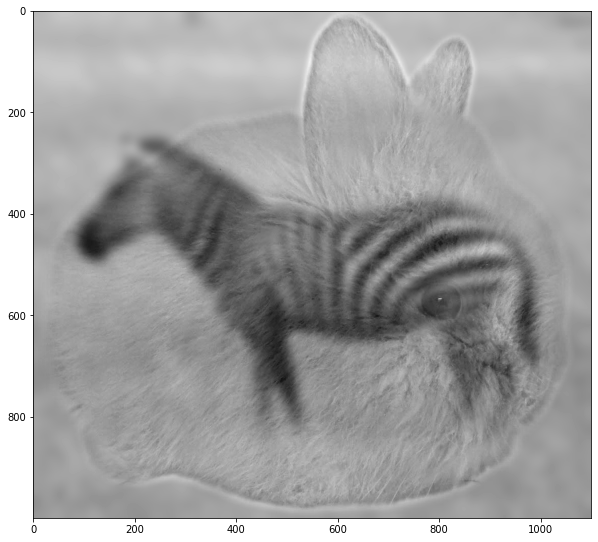

In [18]:
# Hybrid images are a visual illusion created by combining two images into one. One image is blurred and the other image is sharpenned.
# then we sum the two resulting images creating a new "hybrid" image that will change its identity depending on the distance at which
# we will look at it!


# load image 1: im1
img_bgr = cv2.imread("rabbit-9")
print(img_bgr.shape)
img_rgb = cv2.cvtColor(img_bgr[:-11, 150:1250], cv2.COLOR_BGR2RGB)
print(img_rgb.shape)

# make the image gray-scale

rabbit_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# plt.imshow(rabbit_gray, cmap='gray', vmin=0, vmax=255)

# apply a gaussian filter (gaussian kernel should sum up to 1). We will call the output: g1
# Here you can find notes about how to make a Gaussian filter: https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html

rabbit_blurr = cv2.GaussianBlur(rabbit_gray, (51,51), 0)
plt.subplot(1,2,1)
plt.imshow(rabbit_blurr, cmap='gray', vmin=0, vmax=255)

# load image 2: im2
img_bgr = cv2.imread("zebra.jpg")
print(img_bgr.shape)
img_rgb = cv2.cvtColor(img_bgr[50:-50,:], cv2.COLOR_BGR2RGB)


# make the image gray-scale
zebra_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# apply a gaussian filter(gaussian kernel should sum up to 1). We will call the output: g2

zebra_blurr = cv2.GaussianBlur(zebra_gray, (71,71), 0)

plt.subplot(1,2,2)
plt.imshow(zebra_blurr, cmap='gray', vmin=0, vmax=255)

# compute hybrid image: h = g1 + (im2-g2)

h = zebra_blurr + rabbit_gray - rabbit_blurr
plt.figure(figsize=(10,10))
plt.imshow(h, cmap='gray', vmin=0, vmax=255)


## **6. Retinex**

In [19]:
# First load an image. Here is the image I used in the slides:
!wget -nv http://people.csail.mit.edu/torralba/share/course/retinex_square_64x64.png

2021-07-20 00:43:01 URL:http://people.csail.mit.edu/torralba/share/course/retinex_square_64x64.png [3272/3272] -> "retinex_square_64x64.png" [1]


[[ 1. -1.]]
(64, 64)
kernel shape: (1, 2)
kernel shape: (2, 1)
(8192, 1)
(8192, 4096)


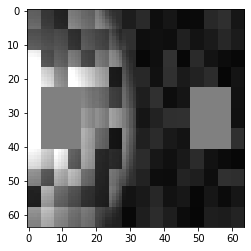

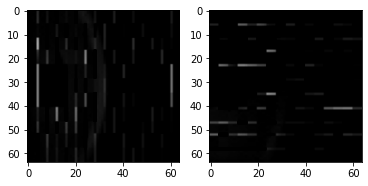

In [59]:
img_rgb = cv2.imread("retinex_square_64x64.png")
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

# filter
derivative_filter = np.array([1, -1], dtype='float').reshape((1,2))
print(derivative_filter)
print(img_gray.shape)

# Horizontal
R1 = getMatrixFromKernel(derivative_filter, img_gray.shape[0])

output1 = np.dot(R1,img_gray.flatten()).reshape(img_gray.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(output1, cmap='gray', vmin=0, vmax=255)

# Vertical
R2 = getMatrixFromKernel(derivative_filter.T, img_gray.shape[0])

output2 = np.dot(R2,img_gray.flatten()).reshape(img_gray.shape)
plt.subplot(1,2,2)
plt.imshow(output2, cmap='gray', vmin=0, vmax=255)

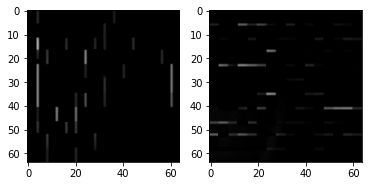

In [121]:
# Filter derivative values
cutoff = 25
filtered_o1 = np.where(np.abs(output1) > cutoff, output1, 0)
filtered_o2 = np.where(np.abs(output2) > 0, output2, 0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(filtered_o1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(filtered_o2, cmap='gray', vmin=0, vmax=255)

(8192, 1)
(8192, 4096)


(array([  23.,   34.,   22.,   89.,  455., 3349.,   62.,   18.,   31.,
          13.]),
 array([-146. , -117.2,  -88.4,  -59.6,  -30.8,   -2. ,   26.8,   55.6,
          84.4,  113.2,  142. ]),
 <a list of 10 Patch objects>)

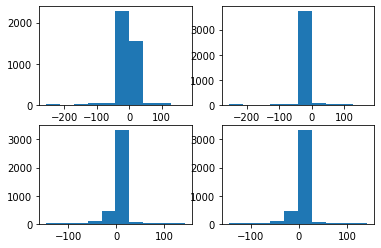

In [126]:


# Reconstruct
G = np.vstack((filtered_o1.flatten().reshape((64**2,1)),filtered_o2.flatten().reshape((64**2,1))))
# G = np.vstack((output1.flatten().reshape((64**2,1)),output2.flatten().reshape((64**2,1))))
H = np.vstack((R1,R2))
print(G.shape)
print(H.shape)

plt.figure()
plt.subplot(2,2,1)
plt.hist(output1.flatten())
plt.subplot(2,2,2)
plt.hist(filtered_o1.flatten())
plt.subplot(2,2,3)
plt.hist(output2.flatten())
plt.subplot(2,2,4)
plt.hist(filtered_o2.flatten())

In [123]:
inv = np.linalg.pinv(H)
orig = np.dot(inv,G).reshape(img_gray.shape)

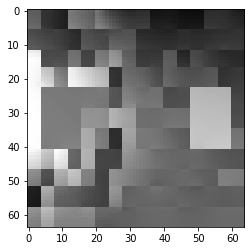

In [124]:
plt.figure()
plt.imshow(orig, cmap='gray', vmin=0, vmax=255)